In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
#https://www.kaggle.com/rakannimer/air-passengers

# Simple Time Series Decomposition

In [20]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [22]:
# set new index as month and convert to datetime
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)

In [23]:
df.shape

(144, 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [25]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [26]:
# drop nulls
df.dropna(inplace=True)

In [31]:
def df_values(df):
    for i in range(0, len(df.columns)):
        print('----------', df.columns[i], '---------')
        print (df.iloc[:,i].value_counts())
        print ('----------', df.columns[i], '---------- \n')
df_values(df) 

---------- #Passengers ---------
229    3
306    2
405    2
242    2
196    2
      ..
191    1
209    1
230    1
218    1
432    1
Name: #Passengers, Length: 118, dtype: int64
---------- #Passengers ---------- 



<AxesSubplot:xlabel='Month'>

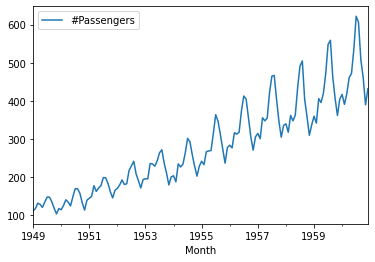

In [27]:
# plot
df.plot()

# seasonal decompose

<AxesSubplot:xlabel='Month'>

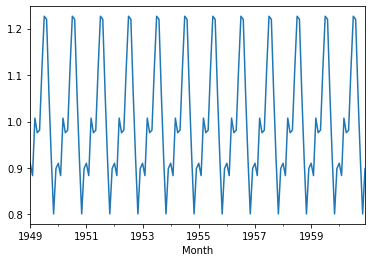

In [28]:
result=seasonal_decompose(df['#Passengers'],  model='multiplicable')   #12 months = multiplicable model
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

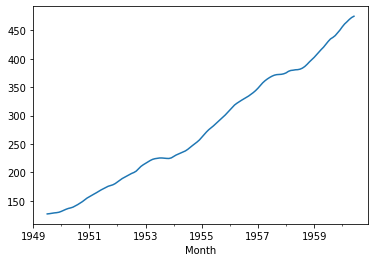

In [29]:
result.trend.plot()

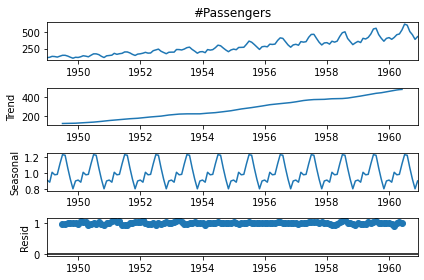

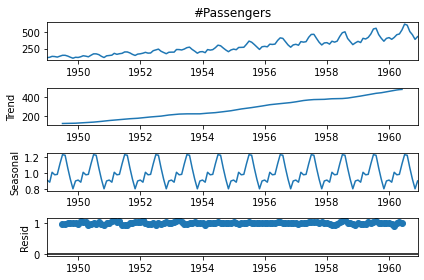

In [30]:
result.plot()

In [ ]:
# trend = we can see that the time series in increasing over time 
# seasonal = shows us the periodic signal over time 
# resid (noise) = shows us the variability in the data that can't be shown in the model